In [35]:
# =========================
# 0_EDA_All.ipynb (PRO EDA) — Flight-Test + TVAC + Flight (Orbit) Data
# No KS-test. Engineering-focused.
# =========================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) Paths (EDIT ONLY HERE)
# -------------------------
DATA_DIR = "data"  # if notebook is inside project root. If inside notebooks/, use "..\\data"

BASE = os.path.join(DATA_DIR, "EIRSAT-1 Dataset")
FLIGHTTEST_PATH = os.path.join(BASE, "Flight Test Data", "flighttest_dataset.csv")
TVAC_PATH       = os.path.join(BASE, "TVAC Test Data", "tvac_dataset.csv")
ORBIT_DIR       = os.path.join(BASE, "Flight Data")  # month-wise channel CSVs

print("Flight-Test:", FLIGHTTEST_PATH)
print("TVAC      :", TVAC_PATH)
print("Orbit dir  :", ORBIT_DIR)



Flight-Test: data\EIRSAT-1 Dataset\Flight Test Data\flighttest_dataset.csv
TVAC      : data\EIRSAT-1 Dataset\TVAC Test Data\tvac_dataset.csv
Orbit dir  : data\EIRSAT-1 Dataset\Flight Data


In [36]:
FLIGHTTEST_PATH = os.path.join(DATA_DIR,
                                "EIRSAT-1 Dataset",
                                "Flight Test Data",
                                "flighttest_dataset.csv")

In [37]:
print(FLIGHTTEST_PATH)

data\EIRSAT-1 Dataset\Flight Test Data\flighttest_dataset.csv


In [38]:
import os
print("Current working directory:")
print(os.getcwd())

Current working directory:
c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\notebooks


In [39]:
print("Does 'data' exist?", os.path.exists("data"))

Does 'data' exist? False


In [40]:
# =========================
# 1) Correct Paths
# =========================
import os
import pandas as pd

# Go from notebooks/ → project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

DATASET_ROOT = os.path.join(PROJECT_ROOT, "data", "EIRSAT-1 Dataset")

FLIGHTTEST_PATH = os.path.join(DATASET_ROOT, "Flight Test Data", "flighttest_dataset.csv")
TVAC_PATH       = os.path.join(DATASET_ROOT, "TVAC Test Data", "tvac_dataset.csv")
ORBIT_DIR       = os.path.join(DATASET_ROOT, "Flight Data")

print("PROJECT_ROOT   :", PROJECT_ROOT)
print("DATASET_ROOT   :", DATASET_ROOT)
print("Flight exists? :", os.path.exists(FLIGHTTEST_PATH))
print("TVAC exists?   :", os.path.exists(TVAC_PATH))
print("Orbit dir exists?", os.path.exists(ORBIT_DIR))

PROJECT_ROOT   : c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning
DATASET_ROOT   : c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\data\EIRSAT-1 Dataset
Flight exists? : True
TVAC exists?   : True
Orbit dir exists? True


In [53]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

# Notebook is in notebooks/, so project root is one level up
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATASET_ROOT = os.path.join(PROJECT_ROOT, "data", "EIRSAT-1 Dataset")
SRC_DIR = os.path.join(PROJECT_ROOT, "src")

# Allow importing src/preprocessing.py
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

import preprocessing  # must exist at src/preprocessing.py

FLIGHTTEST_PATH = os.path.join(DATASET_ROOT, "Flight Test Data", "flighttest_dataset.csv")
TVAC_PATH       = os.path.join(DATASET_ROOT, "TVAC Test Data", "tvac_dataset.csv")
ORBIT_DIR       = os.path.join(DATASET_ROOT, "Flight Data")  # optional

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATASET_ROOT:", DATASET_ROOT)
print("Flight CSV exists?", os.path.exists(FLIGHTTEST_PATH), FLIGHTTEST_PATH)
print("TVAC CSV exists?  ", os.path.exists(TVAC_PATH), TVAC_PATH)
print("Orbit dir exists? ", os.path.exists(ORBIT_DIR), ORBIT_DIR)

assert os.path.exists(FLIGHTTEST_PATH), "Flight CSV not found. Check your folder structure."
assert os.path.exists(TVAC_PATH), "TVAC CSV not found. Check your folder structure."

PROJECT_ROOT: c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning
DATASET_ROOT: c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\data\EIRSAT-1 Dataset
Flight CSV exists? True c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\data\EIRSAT-1 Dataset\Flight Test Data\flighttest_dataset.csv
TVAC CSV exists?   True c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\data\EIRSAT-1 Dataset\TVAC Test Data\tvac_dataset.csv
Orbit dir exists?  True c:\Users\sujit\OneDrive\Documents\GitHub\Satellite Telemetry Anomaly Detection using Classical Machine Learning\data\EIRSAT-1 Dataset\Flight Data


In [54]:
flight_df = pd.read_csv(FLIGHTTEST_PATH, low_memory=False)
tvac_df   = pd.read_csv(TVAC_PATH, low_memory=False)

print("Flight shape:", flight_df.shape)
print("TVAC shape  :", tvac_df.shape)

display(flight_df.head(5))
display(tvac_df.head(5))

Flight shape: (72390, 258)
TVAC shape  : (61109, 257)


,OBT,Channel,Row_ID,core.OBT.uptime,platform.obc.OBC.currBootImage,platform.BAT.batteryCurrent[2],platform.BAT.batteryVoltage[2],platform.BAT.batteryCurrentDir,platform.EPS.actualSwitchStatesBitmap,platform.ADCS.rawGyroRate_2,platform.ADCS.rawGyroRate_1,platform.ADCS.rawGyroRate_0,platform.EPS.busCurrents_3,platform.EPS.busCurrents_2,platform.EPS.busCurrents_1,platform.EPS.busCurrents_0,platform.EPS.busVoltages_3,platform.EPS.busVoltages_2,platform.EPS.busVoltages_1,platform.EPS.busVoltages_0,platform.BAT.packedHeaterStatus_2,platform.BAT.packedHeaterStatus_1,platform.BAT.packedHeaterStatus_0,platform.BAT.batteryTemperature_2,platform.BAT.batteryTemperature_1,platform.BAT.batteryTemperature_0,platform.EPS.switchOvercurrentBitmap,platform.EPS.boardTemperature,platform.EPS.brownOutResetCount,platform.EPS.autoResetCount,platform.EPS.watchdogResetCount,platform.ADCS.arrayTemperature[1],platform.ADCS.arrayTemperature[4],platform.ADCS.arrayTemperature[3],platform.ADCS.arrayTemperature[2],platform.EPS.solarArrayCurrents[1],platform.EPS.solarArrayCurrents[4],platform.EPS.solarArrayCurrents[3],platform.EPS.solarArrayCurrents[2],platform.EPS.solarArrayVoltages[0],platform.EPS.solarArrayVoltages[1],platform.EPS.solarArrayVoltages[2],platform.ADCS.packedADCSMode,platform.ADCS.executionCount,platform.ADCS.estAtt[0],platform.ADCS.estAtt[1],platform.ADCS.estAtt[2],platform.ADCS.estAtt[3],platform.ADCS.fss1AlphaAngle,platform.ADCS.fss1BetaAngle,platform.CMC.mode,platform.CMC.beaconEnable,platform.CMC.txTransparent,platform.CMC.txConvEnabled,platform.CMC.txPower,platform.CMC.rxLock,platform.CMC.temperaturePa,platform.CMC.current5V,platform.CMC.voltage5V,core.EventDispatcher.eventCount,core.EventDispatcher.lastEvent,platform.EPS.rawGyroRate_0,platform.EPS.rawGyroRate_1,platform.EPS.rawGyroRate_2,platform.obc.OBC.mramCorrectableErrorCount,platform.obc.OBC.mramNonCorrectableErrorCount,platform.obc.OBC.flashCorrectableErrorCount,platform.obc.OBC.flashNonCorrectableErrorCount,platform.obc.MagnetometerI2C.nackAddrCount,platform.obc.MagnetometerI2C.hwStateErrorCount,platform.obc.MagnetometerI2C.isrErrorCount,platform.obc.I2CBusA.nackAddrCount,platform.obc.I2CBusA.hwStateErrorCount,platform.obc.I2CBusA.isrErrorCount,platform.obc.I2CBusB.nackAddrCount,platform.obc.I2CBusB.hwStateErrorCount,platform.obc.I2CBusB.isrErrorCount,platform.obc.I2CBusC.nackAddrCount,platform.obc.I2CBusC.hwStateErrorCount,platform.obc.I2CBusC.isrErrorCount,platform.BAT.status,platform.BAT.lastError,platform.BAT.autoResetCount,platform.BAT.brownOutResetCount,platform.EPS.status,platform.EPS.lastError,platform.EPS.softResetCount,platform.ADCS.fss1ErrorCodes,platform.ADCS.fss1ErrorCount,platform.ADCS.busCurrents[0],platform.ADCS.boardTemperature,platform.ADCS.detumbleCounter,platform.CMC.txPacketCount,platform.CMC.txOverrunErrorCount,platform.CMC.rxDtmfAndCounter,platform.CMC.rxPacketCount,platform.CMC.rxDroppedErrorCount,platform.CMC.rxCrcErrorCount,platform.CMC.rxOverrunErrorCount,platform.CMC.rxProtocolErrorCount,...,platform.EPS.switchVoltages_9,platform.EPS.switchVoltages_8,platform.EPS.switchVoltages_7,platform.EPS.switchVoltages_6,platform.EPS.switchVoltages_5,platform.EPS.switchVoltages_4,platform.EPS.switchVoltages_3,platform.EPS.switchVoltages_2,platform.EPS.switchVoltages_1,platform.EPS.switchVoltages_0,platform.BAT.batteryVoltage_2,platform.BAT.batteryVoltage_1,platform.BAT.batteryVoltage_0,platform.BAT.batteryCurrent_2,platform.BAT.batteryCurrent_1,platform.BAT.batteryCurrent_0,platform.ADCS.sensorCurrent,platform.ADCS.mtqCurrent,mission.ModeManager.Mode,platform.OBC.TelemetryADCB.ChannelOutput[7],platform.obc.GPS.lastValidStateVec,payload.EMOD.DP_ResetCounter,payload.EMOD.DP_EMODMode,payload.EMOD.DP_LastPageAddr,payload.EMOD.AutoPollPages,payload.EMOD.NextPageAddrToPoll,payload.GMOD.DP_ResetCounter,payload.GMOD.DP_GMODMode,payload.GMOD.DP_LastPageSumAddr,payload.GMOD.DP_StreamSumChStatus,payload.GMOD.LastPageSumAddrRx,payload.GMOD.DP_LastPage16Addr,payload.GMOD.DP_St

,Unnamed: 0,OBT,Channel,Row_ID,core.OBT.uptime,platform.obc.OBC.currBootImage,platform.BAT.batteryCurrent[2],platform.BAT.batteryVoltage[2],platform.BAT.batteryCurrentDir,platform.EPS.actualSwitchStatesBitmap,platform.ADCS.rawGyroRate_2,platform.ADCS.rawGyroRate_1,platform.ADCS.rawGyroRate_0,platform.EPS.busCurrents_3,platform.EPS.busCurrents_2,platform.EPS.busCurrents_1,platform.EPS.busCurrents_0,platform.EPS.busVoltages_3,platform.EPS.busVoltages_2,platform.EPS.busVoltages_1,platform.EPS.busVoltages_0,platform.BAT.packedHeaterStatus_2,platform.BAT.packedHeaterStatus_1,platform.BAT.packedHeaterStatus_0,platform.BAT.batteryTemperature_2,platform.BAT.batteryTemperature_1,platform.BAT.batteryTemperature_0,platform.EPS.switchOvercurrentBitmap,platform.EPS.boardTemperature,platform.EPS.brownOutResetCount,platform.EPS.autoResetCount,platform.EPS.watchdogResetCount,platform.ADCS.arrayTemperature[1],platform.ADCS.arrayTemperature[4],platform.ADCS.arrayTemperature[3],platform.ADCS.arrayTemperature[2],platform.EPS.solarArrayCurrents[1],platform.EPS.solarArrayCurrents[4],platform.EPS.solarArrayCurrents[3],platform.EPS.solarArrayCurrents[2],platform.EPS.solarArrayVoltages[0],platform.EPS.solarArrayVoltages[1],platform.EPS.solarArrayVoltages[2],platform.ADCS.packedADCSMode,platform.ADCS.executionCount,platform.ADCS.estAtt[0],platform.ADCS.estAtt[1],platform.ADCS.estAtt[2],platform.ADCS.estAtt[3],platform.ADCS.fss1AlphaAngle,platform.ADCS.fss1BetaAngle,platform.CMC.mode,platform.CMC.beaconEnable,platform.CMC.txTransparent,platform.CMC.txConvEnabled,platform.CMC.txPower,platform.CMC.rxLock,platform.CMC.temperaturePa,platform.CMC.current5V,platform.CMC.voltage5V,core.EventDispatcher.eventCount,core.EventDispatcher.lastEvent,platform.EPS.rawGyroRate_0,platform.EPS.rawGyroRate_1,platform.EPS.rawGyroRate_2,platform.obc.OBC.mramCorrectableErrorCount,platform.obc.OBC.mramNonCorrectableErrorCount,platform.obc.OBC.flashCorrectableErrorCount,platform.obc.OBC.flashNonCorrectableErrorCount,platform.obc.MagnetometerI2C.nackAddrCount,platform.obc.MagnetometerI2C.hwStateErrorCount,platform.obc.MagnetometerI2C.isrErrorCount,platform.obc.I2CBusA.nackAddrCount,platform.obc.I2CBusA.hwStateErrorCount,platform.obc.I2CBusA.isrErrorCount,platform.obc.I2CBusB.nackAddrCount,platform.obc.I2CBusB.hwStateErrorCount,platform.obc.I2CBusB.isrErrorCount,platform.obc.I2CBusC.nackAddrCount,platform.obc.I2CBusC.hwStateErrorCount,platform.obc.I2CBusC.isrErrorCount,platform.BAT.status,platform.BAT.lastError,platform.BAT.autoResetCount,platform.BAT.brownOutResetCount,platform.EPS.status,platform.EPS.lastError,platform.EPS.softResetCount,platform.ADCS.fss1ErrorCodes,platform.ADCS.fss1ErrorCount,platform.ADCS.busCurrents[0],platform.ADCS.boardTemperature,platform.ADCS.detumbleCounter,platform.CMC.txPacketCount,platform.CMC.txOverrunErrorCount,platform.CMC.rxDtmfAndCounter,platform.CMC.rxPacketCount,platform.CMC.rxDroppedErrorCount,platform.CMC.rxCrcErrorCount,platform.CMC.rxOverrunErrorCount,...,platform.EPS.switchCurrents_1,platform.EPS.switchCurrents_0,platform.EPS.switchVoltages_9,platform.EPS.switchVoltages_8,platform.EPS.switchVoltages_7,platform.EPS.switchVoltages_6,platform.EPS.switchVoltages_5,platform.EPS.switchVoltages_4,platform.EPS.switchVoltages_3,platform.EPS.switchVoltages_2,platform.EPS.switchVoltages_1,platform.EPS.switchVoltages_0,platform.BAT.batteryVoltage_2,platform.BAT.batteryVoltage_1,platform.BAT.batteryVoltage_0,platform.BAT.batteryCurrent_2,platform.BAT.batteryCurrent_1,platform.BAT.batteryCurrent_0,platform.ADCS.sensorCurrent,platform.ADCS.mtqCurrent,mission.ModeManager.Mode,platform.OBC.TelemetryADCB.ChannelOutput[7],platform.obc.GPS.lastValidStateVec,payload.EMOD.DP_ResetCounter,payload.EMOD.DP_EMODMode,payload.EMOD.DP_LastPageAddr,payload.EMOD.AutoPollPages,payload.EMOD.NextPageAddrToPoll,payload.GMOD.DP_ResetCounter,payload.GMOD.DP_GMODMode,payload.GMOD.DP_LastPageSumAddr,payload.GMOD.DP_StreamSumChStatus,payload.GMOD.LastPageSumAddrRx,payload.GMOD

In [56]:
def basic_report(df: pd.DataFrame, name: str):
    print(f"\n========== {name}: BASIC REPORT ==========")
    print("Shape:", df.shape)
    print("Columns:", len(df.columns))
    print("\nDtype counts:")
    display(df.dtypes.value_counts())

    # memory usage
    mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
    print(f"Memory usage: {mem_mb:.2f} MB")

    # duplicate rows
    dup = df.duplicated().sum()
    print("Duplicate rows:", dup)

    # show a small schema table
    schema = pd.DataFrame({
        "col": df.columns,
        "dtype": df.dtypes.astype(str).values,
        "n_null": df.isna().sum().values,
        "null_frac": (df.isna().mean().values),
        "n_unique": df.nunique(dropna=True).values
    }).sort_values("null_frac", ascending=False)
    display(schema.head(30))
    return schema

def missingness_report(df: pd.DataFrame, name: str, top_n=30):
    miss = df.isna().mean().sort_values(ascending=False)
    miss = miss[miss > 0]
    print(f"\n========== {name}: MISSINGNESS ==========")
    if miss.empty:
        print("No missing values ✅")
        return miss

    display(miss.head(top_n).to_frame("missing_frac"))

    top = miss.head(top_n)
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(top)), top.values)
    plt.xticks(range(len(top)), top.index, rotation=90)
    plt.title(f"{name}: Top {len(top)} columns by missing fraction")
    plt.tight_layout()
    plt.show()
    return miss

def detect_time_like_columns(df: pd.DataFrame):
    keys = ["time", "timestamp", "date", "utc", "seconds", "sec", "ms"]
    cols = [c for c in df.columns if any(k in c.lower() for k in keys)]
    return cols

def numeric_cols(df: pd.DataFrame):
    return df.select_dtypes(include=[np.number]).columns.tolist()

def stuck_sensor_report(df: pd.DataFrame, name: str, top_n=25):
    num = numeric_cols(df)
    if not num:
        print(f"\n{name}: no numeric columns found.")
        return None

    std = df[num].std(numeric_only=True).sort_values()
    nunique = df[num].nunique(dropna=True).sort_values()

    print(f"\n========== {name}: STUCK / NEAR-CONSTANT SENSORS ==========")
    print("Lowest std (likely stuck):")
    display(std.head(top_n).to_frame("std"))

    print("Lowest unique-value counts (also suspicious):")
    display(nunique.head(top_n).to_frame("n_unique"))

    return std, nunique

def outlier_scan(df: pd.DataFrame, name: str, top_n=20):
    num = numeric_cols(df)
    if not num:
        return None

    # Robust “how wild is this feature”: (p99 - p01) / (IQR + eps)
    q01 = df[num].quantile(0.01)
    q99 = df[num].quantile(0.99)
    q25 = df[num].quantile(0.25)
    q75 = df[num].quantile(0.75)
    iqr = (q75 - q25).replace(0, np.nan)
    score = ((q99 - q01) / (iqr + 1e-12)).sort_values(ascending=False)

    print(f"\n========== {name}: OUTLIER-PRONE FEATURES (robust score) ==========")
    display(score.head(top_n).to_frame("outlier_score"))
    return score

def correlation_overview(df: pd.DataFrame, name: str, threshold=0.95, max_pairs=30):
    num = numeric_cols(df)
    if len(num) < 2:
        return None

    corr = df[num].corr(numeric_only=True).abs()
    # upper triangle pairs
    pairs = []
    cols = corr.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr.iloc[i, j]
            if pd.notna(val) and val >= threshold:
                pairs.append((cols[i], cols[j], val))
    pairs.sort(key=lambda x: x[2], reverse=True)

    print(f"\n========== {name}: HIGHLY CORRELATED PAIRS (|corr| >= {threshold}) ==========")
    if not pairs:
        print("No pairs above threshold.")
        return corr, pd.DataFrame(columns=["a","b","abs_corr"])

    df_pairs = pd.DataFrame(pairs[:max_pairs], columns=["a","b","abs_corr"])
    display(df_pairs)
    return corr, df_pairs

def plot_time_series_if_possible(df: pd.DataFrame, name: str, candidate_cols=None, sample_n=5):
    time_cols = detect_time_like_columns(df)
    print(f"\n{name}: time-like columns:", time_cols)

    if not time_cols:
        print("No obvious time column detected. Skipping time-series plots.")
        return

    tcol = time_cols[0]
    # Try parse; if numeric, keep numeric
    t = df[tcol]
    if t.dtype == "object":
        tt = pd.to_datetime(t, errors="coerce")
        if tt.notna().mean() > 0.5:
            df = df.copy()
            df[tcol] = tt
            df = df.sort_values(tcol)
        else:
            print(f"Could not parse {tcol} as datetime reliably. Treating as raw.")
    else:
        df = df.sort_values(tcol)

    num = numeric_cols(df)
    if not num:
        return

    # choose sensors: either provided or auto-pick most variant
    if candidate_cols is None:
        vari = df[num].var(numeric_only=True).sort_values(ascending=False)
        candidate_cols = vari.head(sample_n).index.tolist()
    else:
        candidate_cols = [c for c in candidate_cols if c in df.columns]

    for c in candidate_cols:
        plt.figure(figsize=(12, 3))
        plt.plot(df[tcol].values[:5000], df[c].values[:5000])
        plt.title(f"{name}: {c} vs {tcol} (first 5000 points)")
        plt.tight_layout()
        plt.show()

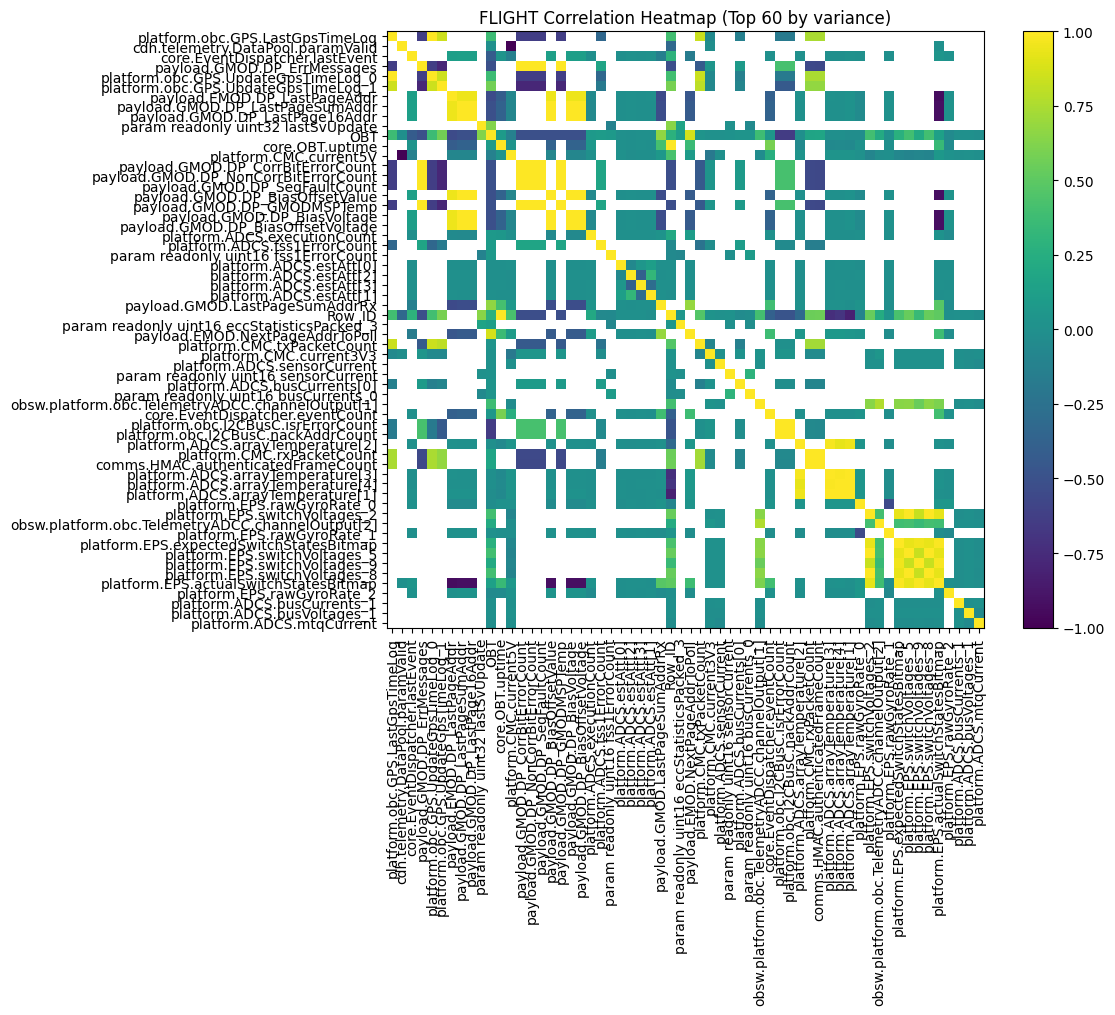

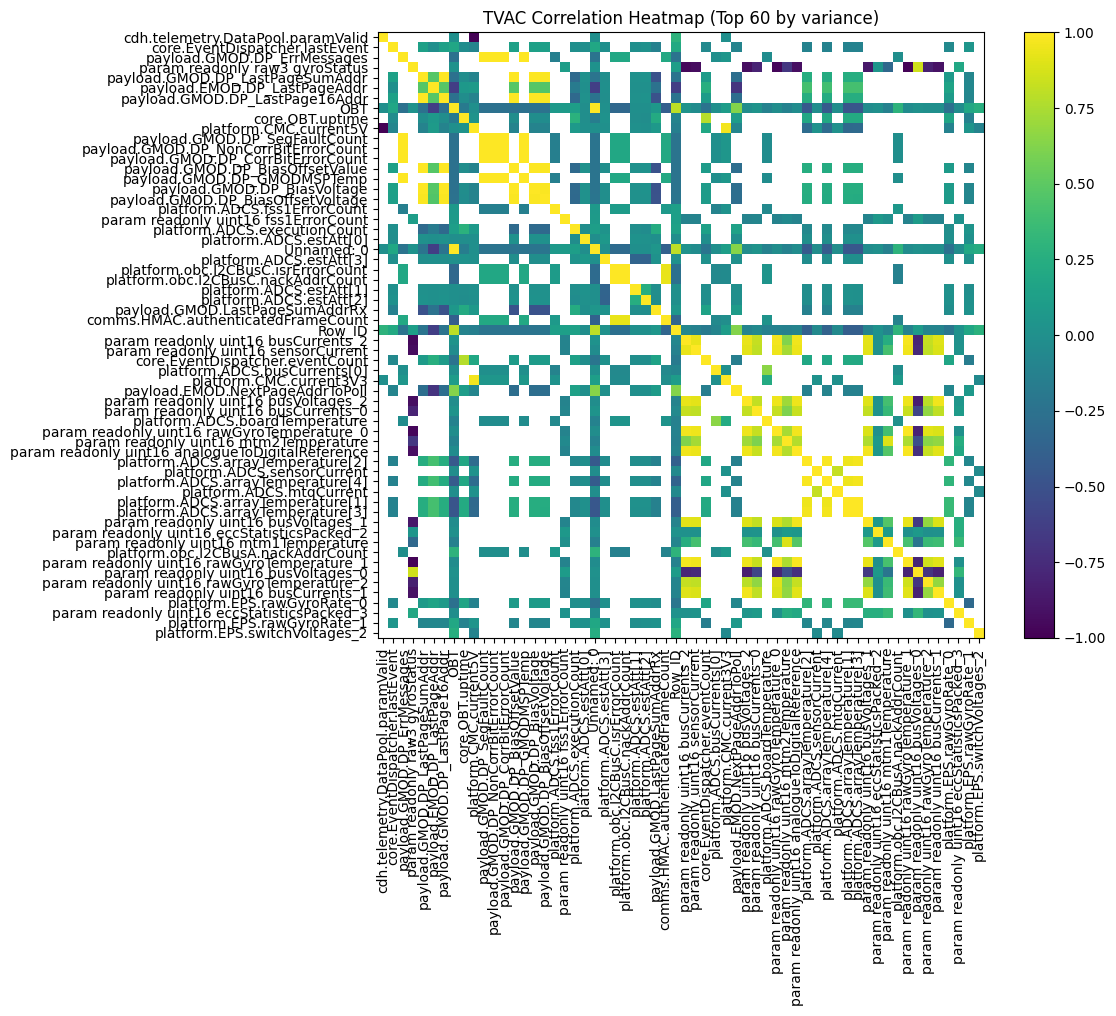

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def correlation_heatmap(df, name, max_features=60):
    num_df = df.select_dtypes(include=[np.number])

    if num_df.shape[1] == 0:
        print("No numeric features.")
        return

    # If too many features, select top-variance ones to keep heatmap readable
    if num_df.shape[1] > max_features:
        vari = num_df.var().sort_values(ascending=False)
        cols = vari.head(max_features).index
        num_df = num_df[cols]

    corr = num_df.corr()

    plt.figure(figsize=(12,10))
    plt.imshow(corr, vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title(f"{name} Correlation Heatmap (Top {num_df.shape[1]} by variance)")
    plt.tight_layout()
    plt.show()

    return corr

corr_flight = correlation_heatmap(flight_df, "FLIGHT")
corr_tvac   = correlation_heatmap(tvac_df, "TVAC")

In [62]:
def high_corr_pairs(df, threshold=0.9):
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr().abs()

    pairs = []
    cols = corr.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr.iloc[i,j] >= threshold:
                pairs.append((cols[i], cols[j], corr.iloc[i,j]))

    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    return pairs

print("Strongly correlated Flight features:")
display(pd.DataFrame(high_corr_pairs(flight_df, 0.9),
                     columns=["Feature A","Feature B","|corr|"]).head(20))

Strongly correlated Flight features:


,Feature A,Feature B,|corr|
0,platform.EPS.brownOutResetCount,platform.EPS.autoResetCount,1.0
1,payload.GMOD.DP_ErrMessages,payload.GMOD.DP_ForbiddenReadCount,1.0
2,payload.GMOD.DP_ErrMessages,payload.GMOD.DP_SegFaultType,1.0
3,platform.CMC.mode,platform.CMC.beaconEnable,1.0
4,platform.CMC.mode,platform.CMC.rxLock,1.0
5,platform.CMC.beaconEnable,platform.CMC.rxLock,1.0
6,platform.obc.I2CBusC.nackAddrCount,platform.obc.I2CBusC.isrErrorCount,1.0
7,payload.GMOD.DP_LastPage16Addr,payload.GMOD.DP_Stream16ChStatus,1.0
8,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_CorrBitErrorCount,1.0
9,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_NonCorrBitErrorCount,1.0



========== FLIGHT TEST: BASIC REPORT ==========
Shape: (72390, 258)
Columns: 258

Dtype counts:


float64    255
int64        2
object       1
Name: count, dtype: int64

Memory usage: 149.04 MB
Duplicate rows: 0


,col,dtype,n_null,null_frac,n_unique
254,Anomaly_1,float64,72367,0.999682,1
255,Anomaly_3,float64,72364,0.999641,1
257,Anomaly_5,float64,72051,0.995317,1
253,Anomaly_4,float64,71294,0.984860,1
226,GMOD.Serial.framingErrors,float64,69931,0.966031,1
230,mission.ModeManager.ExitError,float64,69931,0.966031,1
213,payload.GMOD.DP_CPLDTimeoutCounter,float64,69931,0.966031,4
212,payload.GMOD.DP_FlashRolloverCounter,float64,69931,0.966031,13
211,payload.GMOD.DP_ErrMessages,float64,69931,0.966031,2
210,payload.GMOD.DP_GMODMSPTemp,float64,69931,0.966031,66



========== TVAC: BASIC REPORT ==========
Shape: (61109, 257)
Columns: 257

Dtype counts:


float64    253
int64        4
Name: count, dtype: int64

Memory usage: 119.82 MB
Duplicate rows: 0


,col,dtype,n_null,null_frac,n_unique
256,Anomaly_Bin,float64,61109,1.000000,0
255,Anomaly_1,float64,60613,0.991883,1
228,GMOD.Serial.parityErrors,float64,58711,0.960759,1
230,mission.ModeManager.EntryError,float64,58711,0.960759,1
229,GMOD.Serial.overrunErrors,float64,58711,0.960759,1
231,mission.ModeManager.ExitError,float64,58711,0.960759,1
227,GMOD.Serial.framingErrors,float64,58711,0.960759,1
219,payload.GMOD.DP_ForbiddenReadCount,float64,58711,0.960759,2
220,EMOD.Serial.txFailures,float64,58711,0.960759,1
221,EMOD.Serial.rxFailures,float64,58711,0.960759,1



========== FLIGHT TEST: MISSINGNESS ==========


,missing_frac
Anomaly_1,0.999682
Anomaly_3,0.999641
Anomaly_5,0.995317
Anomaly_4,0.984860
GMOD.Serial.framingErrors,0.966031
mission.ModeManager.ExitError,0.966031
payload.GMOD.DP_CPLDTimeoutCounter,0.966031
payload.GMOD.DP_FlashRolloverCounter,0.966031
payload.GMOD.DP_ErrMessages,0.966031
payload.GMOD.DP_GMODMSPTemp,0.966031


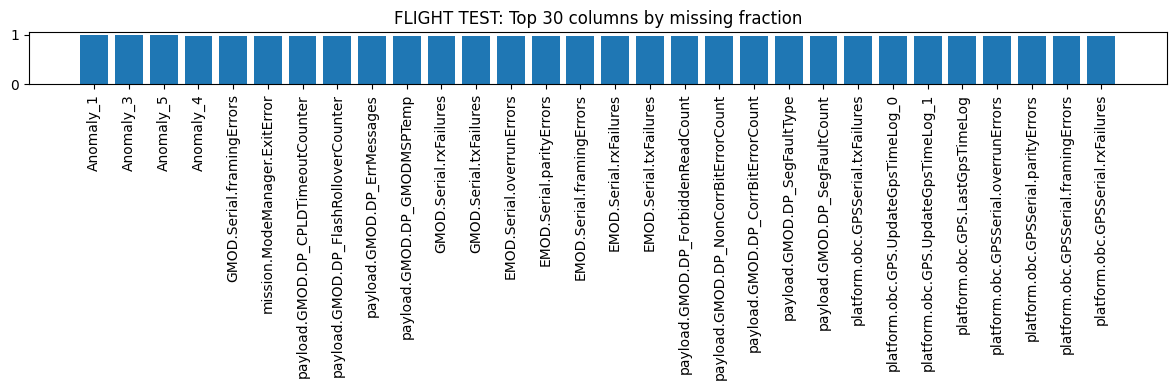


========== TVAC: MISSINGNESS ==========


,missing_frac
Anomaly_Bin,1.000000
Anomaly_1,0.991883
GMOD.Serial.parityErrors,0.960759
mission.ModeManager.EntryError,0.960759
GMOD.Serial.overrunErrors,0.960759
mission.ModeManager.ExitError,0.960759
GMOD.Serial.framingErrors,0.960759
payload.GMOD.DP_ForbiddenReadCount,0.960759
EMOD.Serial.txFailures,0.960759
EMOD.Serial.rxFailures,0.960759


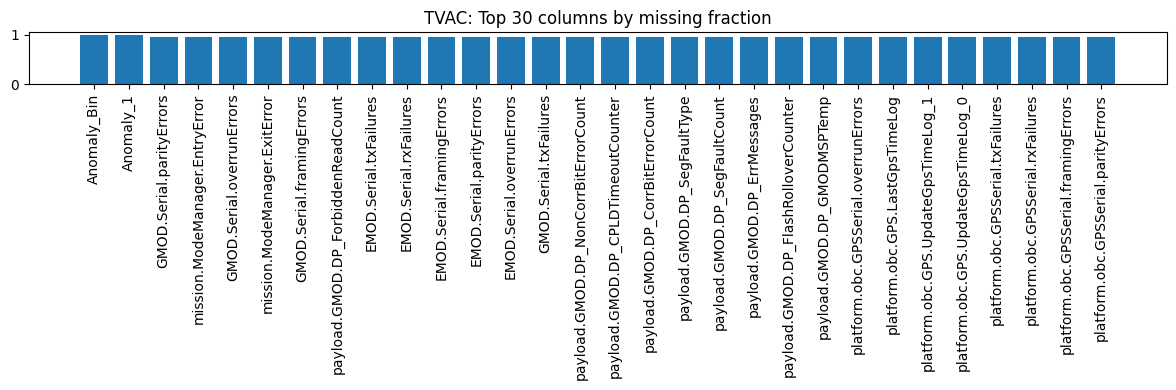


========== FLIGHT TEST: STUCK / NEAR-CONSTANT SENSORS ==========
Lowest std (likely stuck):


,std
platform.BAT.packedHeaterStatus_1,0.0
platform.BAT.packedHeaterStatus_0,0.0
platform.BAT.packedHeaterStatus_2,0.0
platform.EPS.switchOvercurrentBitmap,0.0
GMOD.Serial.rxFailures,0.0
GMOD.Serial.overrunErrors,0.0
GMOD.Serial.parityErrors,0.0
GMOD.Serial.framingErrors,0.0
mission.ModeManager.EntryError,0.0
mission.ModeManager.ExitError,0.0


Lowest unique-value counts (also suspicious):


,n_unique
platform.BAT.packedHeaterStatus_2,1
platform.BAT.packedHeaterStatus_1,1
platform.BAT.packedHeaterStatus_0,1
platform.EPS.switchOvercurrentBitmap,1
GMOD.Serial.rxFailures,1
GMOD.Serial.overrunErrors,1
GMOD.Serial.parityErrors,1
GMOD.Serial.framingErrors,1
mission.ModeManager.ExitError,1
param readonly uint16 currRow,1



========== TVAC: STUCK / NEAR-CONSTANT SENSORS ==========
Lowest std (likely stuck):


,std
platform.ADCS.rawGyroRate_2,0.0
platform.ADCS.rawGyroRate_0,0.0
platform.ADCS.rawGyroRate_1,0.0
platform.EPS.switchOvercurrentBitmap,0.0
platform.CMC.txTransparent,0.0
platform.CMC.txConvEnabled,0.0
platform.CMC.txPower,0.0
platform.obc.I2CBusB.isrErrorCount,0.0
platform.obc.I2CBusA.hwStateErrorCount,0.0
platform.obc.MagnetometerI2C.isrErrorCount,0.0


Lowest unique-value counts (also suspicious):


,n_unique
Anomaly_Bin,0
EMOD.Serial.overrunErrors,1
mission.ModeManager.EntryError,1
platform.EPS.switchOvercurrentBitmap,1
platform.obc.GPSSerial.framingErrors,1
param readonly uint16 totalFixFailures,1
param readonly uint16 successfulSvUpdates,1
GMOD.Serial.overrunErrors,1
param readonly uint16 currRow,1
mission.ModeManager.ExitError,1



========== FLIGHT TEST: OUTLIER-PRONE FEATURES (robust score) ==========


,outlier_score
platform.ADCS.busVoltages_0,511.000000
platform.EPS.busCurrents_0,190.000000
platform.CMC.current3V3,156.831579
platform.EPS.solarArrayVoltages_2,89.000000
platform.EPS.solarArrayVoltages[2],88.000000
platform.EPS.busCurrents_2,38.818182
platform.EPS.busVoltages_3,29.000000
platform.EPS.solarArrayCurrents[1],23.764706
platform.EPS.solarArrayCurrents_1,23.764706
platform.EPS.busCurrents_1,17.812500



========== TVAC: OUTLIER-PRONE FEATURES (robust score) ==========


,outlier_score
platform.BAT.batteryVoltage_0,775.000000
platform.ADCS.busVoltages_0,511.000000
platform.EPS.solarArrayCurrents[3],266.000000
platform.EPS.solarArrayCurrents_3,266.000000
platform.EPS.busCurrents_0,126.750000
platform.CMC.rxDtmfAndCounter,88.000000
platform.EPS.busCurrents_1,78.818182
platform.BAT.batteryTemperature_1,55.461538
platform.BAT.batteryTemperature_0,51.642857
platform.BAT.batteryTemperature_2,51.642857



========== FLIGHT TEST: HIGHLY CORRELATED PAIRS (|corr| >= 0.95) ==========


,a,b,abs_corr
0,platform.EPS.brownOutResetCount,platform.EPS.autoResetCount,1.0
1,payload.GMOD.DP_ErrMessages,payload.GMOD.DP_ForbiddenReadCount,1.0
2,payload.GMOD.DP_ErrMessages,payload.GMOD.DP_SegFaultType,1.0
3,platform.CMC.mode,platform.CMC.beaconEnable,1.0
4,platform.CMC.mode,platform.CMC.rxLock,1.0
5,platform.CMC.beaconEnable,platform.CMC.rxLock,1.0
6,platform.obc.I2CBusC.nackAddrCount,platform.obc.I2CBusC.isrErrorCount,1.0
7,payload.GMOD.DP_LastPage16Addr,payload.GMOD.DP_Stream16ChStatus,1.0
8,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_CorrBitErrorCount,1.0
9,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_NonCorrBitErrorCount,1.0



========== TVAC: HIGHLY CORRELATED PAIRS (|corr| >= 0.95) ==========


,a,b,abs_corr
0,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_SegFaultType,1.000000
1,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_ForbiddenReadCount,1.000000
2,payload.GMOD.DP_SegFaultType,payload.GMOD.DP_CorrBitErrorCount,1.000000
3,payload.GMOD.DP_SegFaultType,payload.GMOD.DP_NonCorrBitErrorCount,1.000000
4,payload.GMOD.DP_CorrBitErrorCount,payload.GMOD.DP_ForbiddenReadCount,1.000000
5,payload.GMOD.DP_NonCorrBitErrorCount,payload.GMOD.DP_ForbiddenReadCount,1.000000
6,payload.GMOD.DP_SegFaultType,payload.GMOD.DP_ForbiddenReadCount,1.000000
7,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_CorrBitErrorCount,1.000000
8,payload.GMOD.DP_SegFaultCount,payload.GMOD.DP_NonCorrBitErrorCount,1.000000
9,payload.GMOD.DP_CorrBitErrorCount,payload.GMOD.DP_NonCorrBitErrorCount,1.000000



FLIGHT TEST: time-like columns: ['core.OBT.uptime', 'comms.HMAC.authenticatedFrameCount', 'comms.HMAC.failedAuthenticationCount', 'comms.HMAC.droppedFrameCount', 'comms.HMAC.seqResyncCount', 'payload.GMOD.DP_StreamSumChStatus', 'platform.obc.GPS.LastGpsTimeLog', 'platform.obc.GPS.UpdateGpsTimeLog_1', 'platform.obc.GPS.UpdateGpsTimeLog_0', 'payload.GMOD.DP_GMODMSPTemp', 'payload.GMOD.DP_CPLDTimeoutCounter', 'param readonly uint32 lastSvUpdate', 'param readonly uint16 successfulSvUpdates']


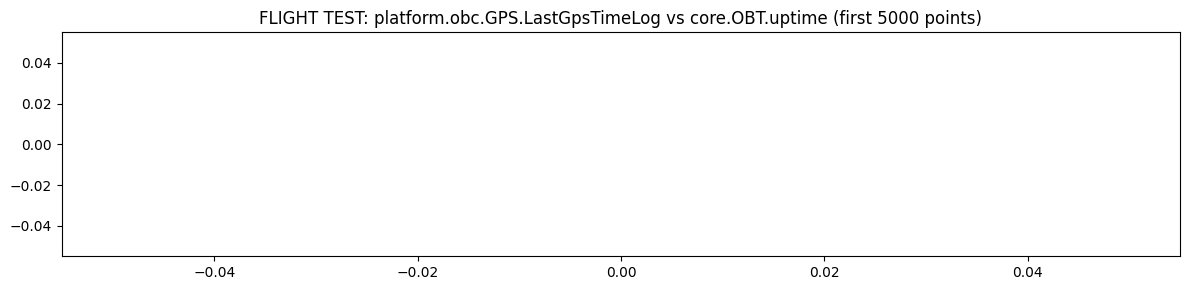

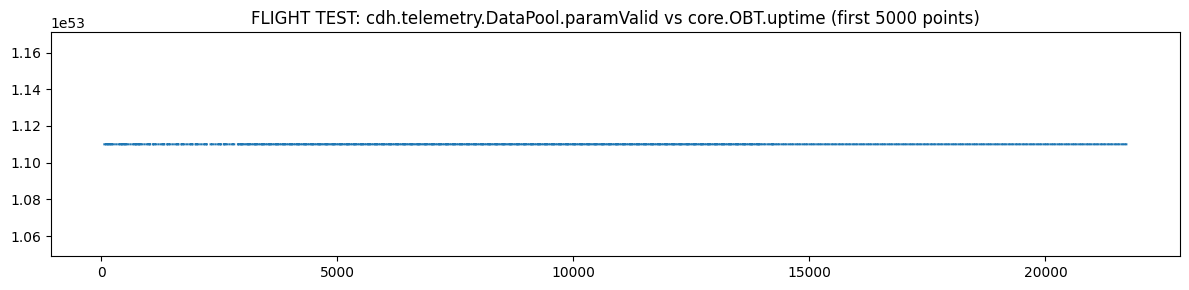

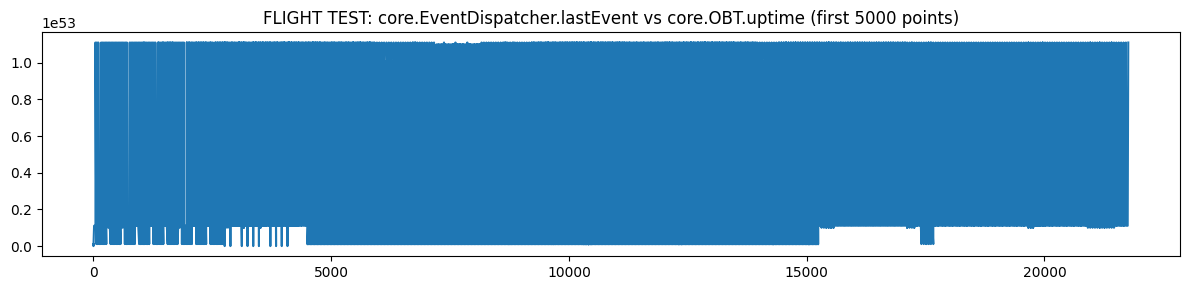

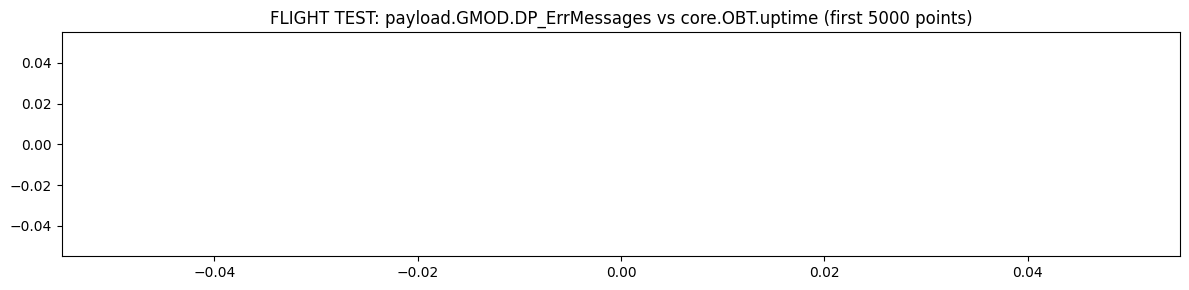

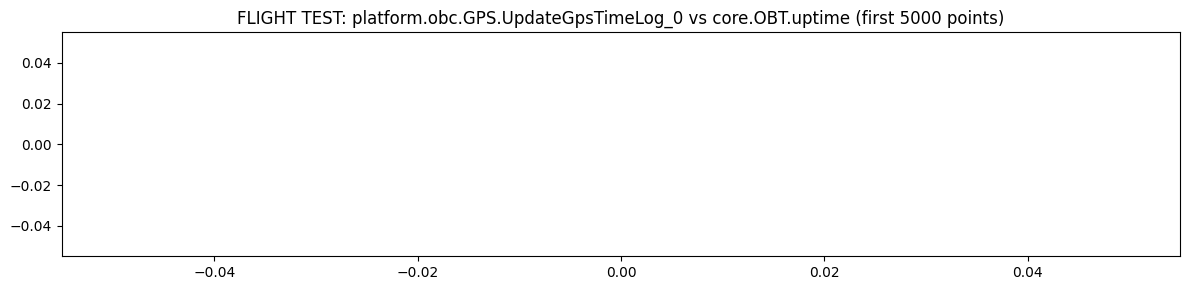


TVAC: time-like columns: ['core.OBT.uptime', 'comms.HMAC.authenticatedFrameCount', 'comms.HMAC.failedAuthenticationCount', 'comms.HMAC.droppedFrameCount', 'comms.HMAC.seqResyncCount', 'payload.GMOD.DP_StreamSumChStatus', 'platform.obc.GPS.LastGpsTimeLog', 'platform.obc.GPS.UpdateGpsTimeLog_1', 'platform.obc.GPS.UpdateGpsTimeLog_0', 'payload.GMOD.DP_GMODMSPTemp', 'payload.GMOD.DP_CPLDTimeoutCounter', 'param readonly uint32 lastSvUpdate', 'param readonly uint16 successfulSvUpdates']


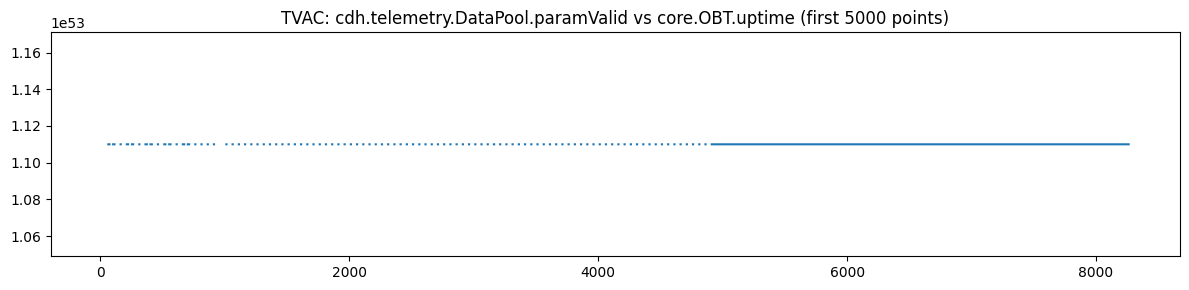

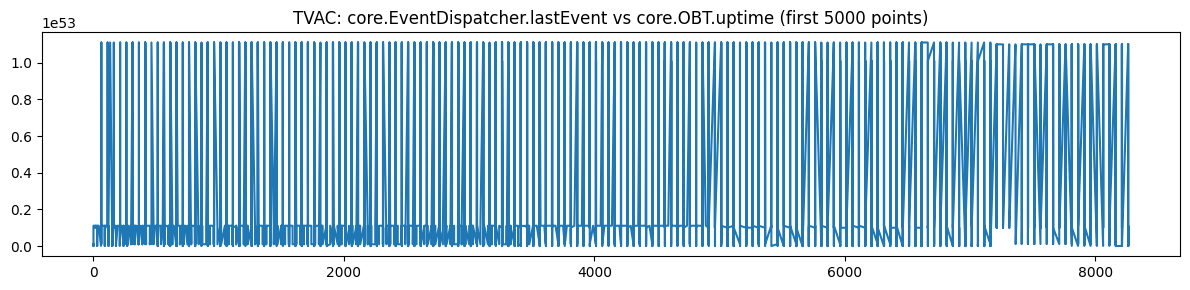

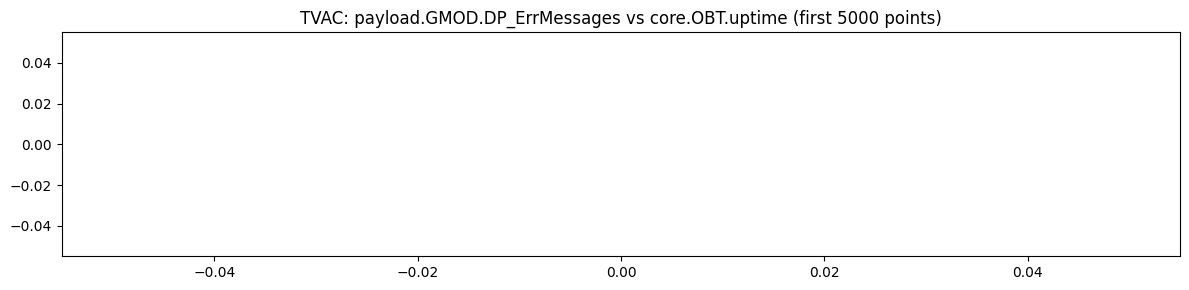

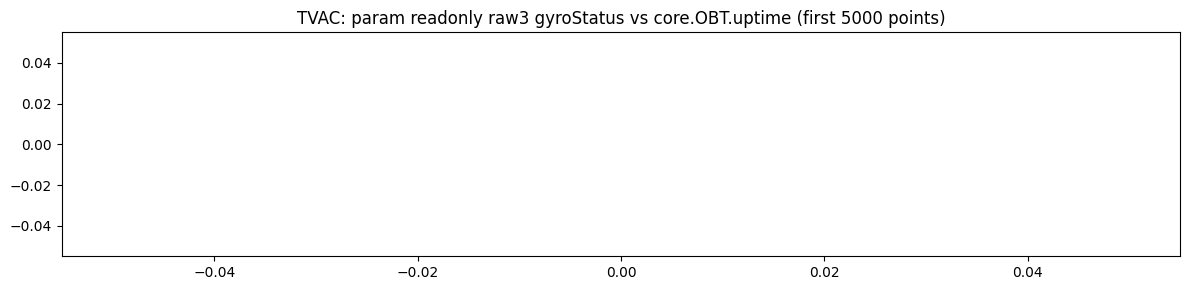

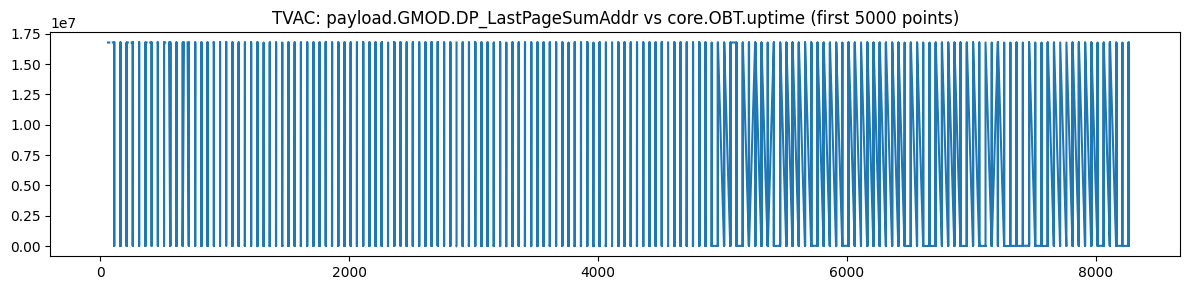

In [57]:
flight_schema = basic_report(flight_df, "FLIGHT TEST")
tvac_schema   = basic_report(tvac_df,   "TVAC")

flight_miss = missingness_report(flight_df, "FLIGHT TEST")
tvac_miss   = missingness_report(tvac_df,   "TVAC")

stuck_sensor_report(flight_df, "FLIGHT TEST")
stuck_sensor_report(tvac_df,   "TVAC")

outlier_scan(flight_df, "FLIGHT TEST")
outlier_scan(tvac_df,   "TVAC")

correlation_overview(flight_df, "FLIGHT TEST", threshold=0.95)
correlation_overview(tvac_df,   "TVAC", threshold=0.95)

plot_time_series_if_possible(flight_df, "FLIGHT TEST")
plot_time_series_if_possible(tvac_df,   "TVAC")


========== FLIGHT vs TVAC: COMMON NUMERIC FEATURES ==========
Common numeric columns: 254

Top drifted features (by median shift / Flight IQR):


,median_shift_over_fIQR,spread_ratio_tIQR_over_fIQR
platform.EPS.solarArrayVoltages[0],9.805556,10.111111
platform.CMC.current3V3,8.263158,9.778947
platform.EPS.watchdogResetCount,4.000000,NaN
OBT,3.830394,0.975628
platform.EPS.solarArrayVoltages[1],3.400000,3.480000
platform.obc.I2CBusC.isrErrorCount,2.220709,5.543540
platform.obc.I2CBusC.nackAddrCount,2.220709,5.543540
platform.ADCS.boardTemperature,2.009058,2.189312
param readonly uint16 rawGyroTemperature_2,2.000000,2.333333
param readonly uint16 rawGyroTemperature_1,2.000000,2.333333


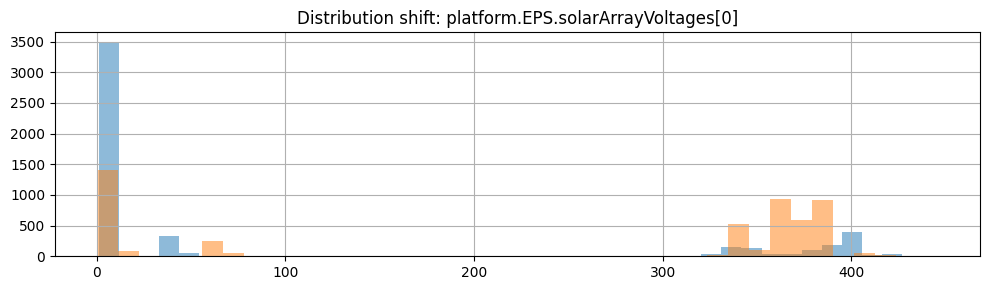

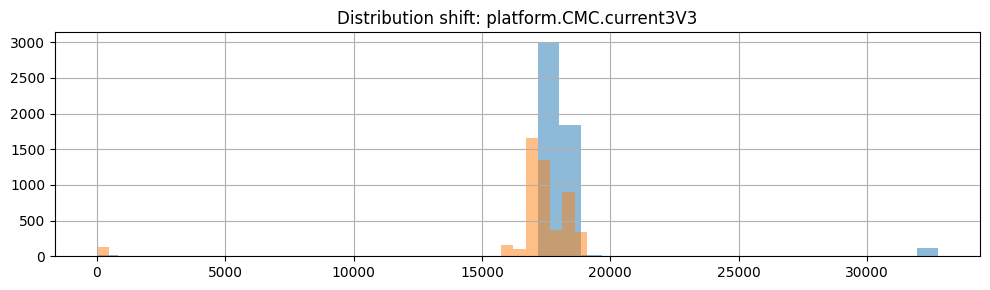

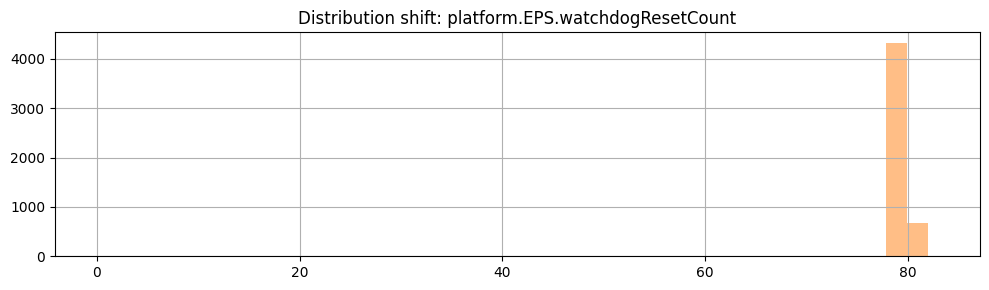

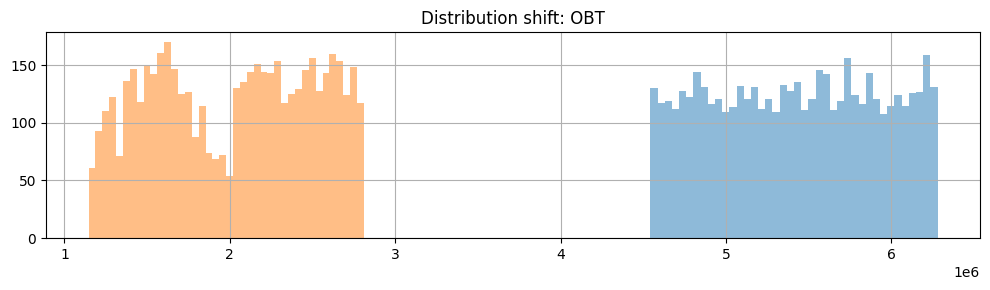

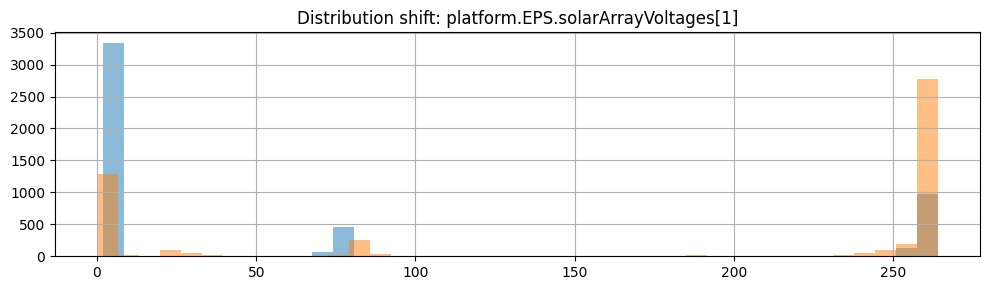

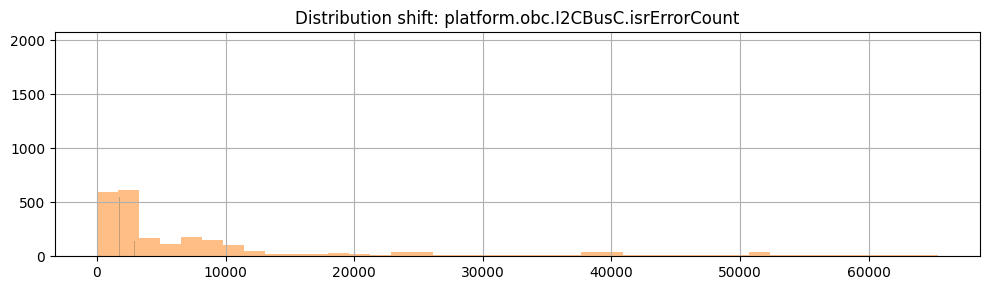

In [58]:
def drift_report(flight_df: pd.DataFrame, tvac_df: pd.DataFrame, top_n=25):
    fnum = set(numeric_cols(flight_df))
    tnum = set(numeric_cols(tvac_df))
    common = sorted(list(fnum & tnum))
    print("\n========== FLIGHT vs TVAC: COMMON NUMERIC FEATURES ==========")
    print("Common numeric columns:", len(common))
    if not common:
        return None

    # simple drift metric: standardized median shift + spread ratio
    f_med = flight_df[common].median(numeric_only=True)
    t_med = tvac_df[common].median(numeric_only=True)

    f_iqr = (flight_df[common].quantile(0.75) - flight_df[common].quantile(0.25)).replace(0, np.nan)
    t_iqr = (tvac_df[common].quantile(0.75) - tvac_df[common].quantile(0.25)).replace(0, np.nan)

    med_shift = ((t_med - f_med).abs() / (f_iqr.abs() + 1e-12))
    spread_ratio = (t_iqr / (f_iqr + 1e-12)).abs()

    drift = pd.DataFrame({
        "median_shift_over_fIQR": med_shift,
        "spread_ratio_tIQR_over_fIQR": spread_ratio
    }).sort_values("median_shift_over_fIQR", ascending=False)

    print("\nTop drifted features (by median shift / Flight IQR):")
    display(drift.head(top_n))

    # plot a few of the most drifted
    cols = drift.head(6).index.tolist()
    for c in cols:
        plt.figure(figsize=(10, 3))
        flight_df[c].dropna().sample(min(5000, flight_df[c].dropna().shape[0]), random_state=0).hist(alpha=0.5, bins=40)
        tvac_df[c].dropna().sample(min(5000, tvac_df[c].dropna().shape[0]), random_state=0).hist(alpha=0.5, bins=40)
        plt.title(f"Distribution shift: {c}")
        plt.tight_layout()
        plt.show()

    return drift

drift_tbl = drift_report(flight_df, tvac_df)

In [59]:
def predominant_by_variance(df: pd.DataFrame, name: str, top_n=30):
    num = numeric_cols(df)
    if not num:
        return None
    var = df[num].var(numeric_only=True).sort_values(ascending=False)
    print(f"\n========== {name}: PREDOMINANT BY VARIANCE (most dynamic sensors) ==========")
    display(var.head(top_n).to_frame("variance"))
    return var

pred_var_flight = predominant_by_variance(flight_df, "FLIGHT TEST")
pred_var_tvac   = predominant_by_variance(tvac_df,   "TVAC")


========== FLIGHT TEST: PREDOMINANT BY VARIANCE (most dynamic sensors) ==========


,variance
platform.obc.GPS.LastGpsTimeLog,2.493919e+117
cdh.telemetry.DataPool.paramValid,3.076508e+105
core.EventDispatcher.lastEvent,2.303628e+105
payload.GMOD.DP_ErrMessages,2.634074e+61
platform.obc.GPS.UpdateGpsTimeLog_0,4.570970e+18
platform.obc.GPS.UpdateGpsTimeLog_1,1.211833e+18
payload.EMOD.DP_LastPageAddr,6.031031e+13
payload.GMOD.DP_LastPageSumAddr,5.981970e+13
payload.GMOD.DP_LastPage16Addr,3.371696e+13
param readonly uint32 lastSvUpdate,7.286183e+12



========== TVAC: PREDOMINANT BY VARIANCE (most dynamic sensors) ==========


,variance
cdh.telemetry.DataPool.paramValid,3.075868e+105
core.EventDispatcher.lastEvent,2.071962e+105
payload.GMOD.DP_ErrMessages,2.909858e+61
param readonly raw3 gyroStatus,6.381166e+31
payload.GMOD.DP_LastPageSumAddr,6.608373e+13
payload.EMOD.DP_LastPageAddr,5.764741e+13
payload.GMOD.DP_LastPage16Addr,3.724036e+13
OBT,2.299026e+11
core.OBT.uptime,1.327731e+10
platform.CMC.current5V,2.330632e+09


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

def predominant_by_label(df: pd.DataFrame, name: str, label_col="label", top_n=30):
    if label_col not in df.columns:
        print(f"\n{name}: no '{label_col}' column found. Skipping label-based importance.")
        return None

    num = numeric_cols(df)
    if label_col in num:
        num.remove(label_col)

    X = df[num]
    y = df[label_col]

    # Drop rows with missing labels (if any)
    mask = y.notna()
    X = X.loc[mask]
    y = y.loc[mask]

    # Mutual information needs numeric + no NaNs
    imp_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=True, with_std=True))
    ])
    Xp = imp_pipe.fit_transform(X)

    print(f"\n========== {name}: PREDOMINANT FEATURES VS LABEL ==========")
    print("Samples:", X.shape[0], "Features:", X.shape[1])
    print("Label distribution:")
    display(y.value_counts().head(20))

    # Mutual information (fast, robust)
    mi = mutual_info_classif(Xp, y, discrete_features=False, random_state=0)
    mi_s = pd.Series(mi, index=num).sort_values(ascending=False)
    print("\nTop features by mutual information:")
    display(mi_s.head(top_n).to_frame("mutual_info"))

    # Quick tree importance (captures non-linear interactions)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, stratify=y if y.nunique() < 50 else None
    )

    model = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("rf", RandomForestClassifier(
            n_estimators=300,
            random_state=0,
            n_jobs=-1,
            class_weight="balanced_subsample"
        ))
    ])
    model.fit(X_train, y_train)
    rf = model.named_steps["rf"]
    rf_imp = pd.Series(rf.feature_importances_, index=num).sort_values(ascending=False)

    print("\nTop features by RandomForest importance:")
    display(rf_imp.head(top_n).to_frame("rf_importance"))

    return {"mutual_info": mi_s, "rf_importance": rf_imp}

pred_label_flight = predominant_by_label(flight_df, "FLIGHT TEST", label_col="label")
pred_label_tvac   = predominant_by_label(tvac_df,   "TVAC",       label_col="label")


FLIGHT TEST: no 'label' column found. Skipping label-based importance.

TVAC: no 'label' column found. Skipping label-based importance.


In [61]:
import inspect

print("Functions in preprocessing.py:")
funcs = [name for name, obj in inspect.getmembers(preprocessing) if inspect.isfunction(obj)]
print(funcs)

Functions in preprocessing.py:
['add_anomaly_bin', 'fit_preprocessing', 'pca_reconstruction_error', 'transform_dataset']


In [64]:
LABEL_COL = "label" if "label" in flight_df.columns else None
print("LABEL_COL:", LABEL_COL)

# keep only numeric features for classical ML unless your preprocessing handles categoricals
num_cols = flight_df.select_dtypes(include=[np.number]).columns.tolist()
if LABEL_COL and LABEL_COL in num_cols:
    num_cols.remove(LABEL_COL)

print("Numeric feature count:", len(num_cols))
print("Example features:", num_cols[:10])

LABEL_COL: None
Numeric feature count: 257
Example features: ['OBT', 'Channel', 'Row_ID', 'core.OBT.uptime', 'platform.obc.OBC.currBootImage', 'platform.BAT.batteryCurrent[2]', 'platform.BAT.batteryVoltage[2]', 'platform.BAT.batteryCurrentDir', 'platform.EPS.actualSwitchStatesBitmap', 'platform.ADCS.rawGyroRate_2']


In [65]:
# This likely adds a column like "anomaly_bin" from label logic.
# Run it on both so targets are consistent.
flight_df2 = preprocessing.add_anomaly_bin(flight_df.copy())
tvac_df2   = preprocessing.add_anomaly_bin(tvac_df.copy())

# Try to auto-detect the produced binary column
candidate_bins = [c for c in flight_df2.columns if "anomaly" in c.lower() and "bin" in c.lower()]
print("Candidate anomaly bin columns:", candidate_bins)

Candidate anomaly bin columns: ['Anomaly_Bin']


In [66]:
ANOM_COL = candidate_bins[0] if candidate_bins else None
print("ANOM_COL:", ANOM_COL)

if ANOM_COL:
    print("Flight anomaly distribution:")
    print(flight_df2[ANOM_COL].value_counts(dropna=False))

ANOM_COL: Anomaly_Bin
Flight anomaly distribution:
Anomaly_Bin
0    55055
1    17335
Name: count, dtype: int64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Helper: detect a time column
# -----------------------------
def guess_time_col(df):
    candidates = [c for c in df.columns if any(k in c.lower() for k in
                    ["time", "timestamp", "utc", "date", "seconds", "sec", "ms"])]
    return candidates[0] if candidates else None

def make_time_series(df, time_col):
    """Return sorted df with a usable time axis (datetime if possible)."""
    d = df.copy()
    if time_col is None or time_col not in d.columns:
        return d, None

    # Try parse to datetime if looks like string dates
    if d[time_col].dtype == "object":
        t = pd.to_datetime(d[time_col], errors="coerce")
        if t.notna().mean() > 0.5:
            d[time_col] = t
    d = d.sort_values(time_col)
    return d, time_col



In [2]:
# -----------------------------
# Helper: find likely battery voltage columns
# -----------------------------
def find_columns_by_keywords(df, include_keywords, exclude_keywords=None, max_hits=20):
    include_keywords = [k.lower() for k in include_keywords]
    exclude_keywords = [k.lower() for k in (exclude_keywords or [])]
    hits = []
    for c in df.columns:
        cl = c.lower()
        if all(k in cl for k in include_keywords) and not any(x in cl for x in exclude_keywords):
            hits.append(c)
    return hits[:max_hits]



In [3]:
# -----------------------------
# Plot: sensor over time + anomaly overlay
# -----------------------------
def plot_over_time(df, name, col, time_col=None, anomaly_col="Anomaly_Bin", n=20000):
    if col not in df.columns:
        print(f"{name}: '{col}' not found")
        return

    d = df.copy()
    if len(d) > n:
        d = d.sample(n, random_state=0).sort_index()  # sample to keep plots fast

    d, tcol = make_time_series(d, time_col)

    x = d[tcol] if tcol else np.arange(len(d))
    y = pd.to_numeric(d[col], errors="coerce")

    plt.figure(figsize=(12, 3))
    plt.plot(x, y.values, linewidth=1)
    plt.title(f"{name}: {col} over time")
    plt.tight_layout()
    plt.show()

    # overlay anomalies if present
    if anomaly_col in d.columns:
        an = d[anomaly_col].fillna(0).astype(int).values
        if an.sum() > 0:
            plt.figure(figsize=(12, 3))
            plt.plot(x, y.values, linewidth=1)
            # mark anomalous points
            idx = np.where(an == 1)[0]
            plt.scatter(np.array(x)[idx], y.values[idx], s=10)
            plt.title(f"{name}: {col} over time (anomalies highlighted)")
            plt.tight_layout()
            plt.show()



In [4]:
# -----------------------------
# PCA EDA helpers (your preprocessing output)
# -----------------------------
def plot_pca_components_over_time(df, name, prep, time_col=None, k=3, n=20000):
    Xp = preprocessing.transform_dataset(df, prep)  # shape (N, n_components)
    if Xp is None:
        return
    Xp = np.asarray(Xp)

    d = df.copy()
    if len(d) > n:
        d = d.sample(n, random_state=0).sort_index()

    d, tcol = make_time_series(d, time_col)
    x = d[tcol] if tcol else np.arange(len(d))

    comps = min(k, Xp.shape[1])
    for i in range(comps):
        plt.figure(figsize=(12, 3))
        plt.plot(x, Xp[:len(d), i], linewidth=1)
        plt.title(f"{name}: PCA component {i+1} over time")
        plt.tight_layout()
        plt.show()

def plot_recon_error_over_time(df, name, prep, time_col=None, anomaly_col="Anomaly_Bin", n=20000):
    d = preprocessing.add_anomaly_bin(df.copy())
    err = preprocessing.pca_reconstruction_error(d, prep)
    d["pca_recon_error"] = err

    if len(d) > n:
        d = d.sample(n, random_state=0).sort_index()

    d, tcol = make_time_series(d, time_col)
    x = d[tcol] if tcol else np.arange(len(d))

    plt.figure(figsize=(12, 3))
    plt.plot(x, d["pca_recon_error"].values, linewidth=1)
    plt.title(f"{name}: PCA reconstruction error over time")
    plt.tight_layout()
    plt.show()

    if anomaly_col in d.columns and d[anomaly_col].fillna(0).astype(int).sum() > 0:
        idx = np.where(d[anomaly_col].fillna(0).astype(int).values == 1)[0]
        plt.figure(figsize=(12, 3))
        plt.plot(x, d["pca_recon_error"].values, linewidth=1)
        plt.scatter(np.array(x)[idx], d["pca_recon_error"].values[idx], s=10)
        plt.title(f"{name}: Recon error over time (anomalies highlighted)")
        plt.tight_layout()
        plt.show()



In [5]:
# -----------------------------
# PCA interpretation: explained variance + top loadings
# -----------------------------
def pca_explained_variance(prep):
    pca = prep["pca"]
    evr = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 3))
    plt.plot(np.cumsum(evr), marker="o")
    plt.title("PCA cumulative explained variance")
    plt.xlabel("Component index")
    plt.ylabel("Cumulative explained variance")
    plt.tight_layout()
    plt.show()
    print("Number of components:", pca.n_components_)
    print("Total explained variance:", evr.sum())

def top_feature_loadings(prep, pc=1, top_n=20):
    cols = prep["columns"]
    comp = prep["pca"].components_[pc-1]  # pc=1 => index 0
    s = pd.Series(comp, index=cols).sort_values(key=lambda x: np.abs(x), ascending=False)
    display(s.head(top_n).to_frame(f"PC{pc}_loading"))
    return s

In [7]:
from src import preprocessing
# 1) Make sure anomalies exist (your preprocessing creates this)
flight_l = preprocessing.add_anomaly_bin(flight_df)
tvac_l   = preprocessing.add_anomaly_bin(tvac_df)

# 2) Fit preprocessing (your current design fits on Flight+TVAC)
prep = preprocessing.fit_preprocessing(flight_df, tvac_df, pca_variance=0.95)

# 3) Time columns
t_f = guess_time_col(flight_l)
t_t = guess_time_col(tvac_l)
print("Flight time col guess:", t_f)
print("TVAC time col guess  :", t_t)

# 4) Find battery voltage-like columns (best-effort)
# Try a few keyword combos
bv_f = find_columns_by_keywords(flight_l, include_keywords=["battery", "volt"])
bv_t = find_columns_by_keywords(tvac_l,   include_keywords=["battery", "volt"])
print("Flight battery-volt candidates:", bv_f)
print("TVAC battery-volt candidates  :", bv_t)

# If none found, broaden search to just 'volt'
if not bv_t:
    bv_t = find_columns_by_keywords(tvac_l, include_keywords=["volt"])
    print("TVAC voltage candidates:", bv_t)

# 5) Plot the first candidate (edit index if you want a different channel)
if bv_t:
    plot_over_time(tvac_l, "TVAC", bv_t[0], time_col=t_t)
if bv_f:
    plot_over_time(flight_l, "FLIGHT", bv_f[0], time_col=t_f)

# 6) PCA component trajectories over time
plot_pca_components_over_time(tvac_df, "TVAC", prep, time_col=t_t, k=3)
plot_pca_components_over_time(flight_df, "FLIGHT", prep, time_col=t_f, k=3)

# 7) Reconstruction error over time (+ anomaly overlay if available)
plot_recon_error_over_time(tvac_df, "TVAC", prep, time_col=t_t)
plot_recon_error_over_time(flight_df, "FLIGHT", prep, time_col=t_f)

# 8) PCA explained variance + which sensors dominate PC1/PC2
pca_explained_variance(prep)
top_feature_loadings(prep, pc=1, top_n=20)
top_feature_loadings(prep, pc=2, top_n=20)

ModuleNotFoundError: No module named 'src'

In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

# Adjust if notebook is inside notebooks/
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATASET_ROOT = os.path.join(PROJECT_ROOT, "data", "EIRSAT-1 Dataset")
SRC_DIR      = os.path.join(PROJECT_ROOT, "src")

if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

import preprocessing

FLIGHT_PATH = os.path.join(DATASET_ROOT, "Flight Test Data", "flighttest_dataset.csv")
TVAC_PATH   = os.path.join(DATASET_ROOT, "TVAC Test Data", "tvac_dataset.csv")

print("Flight exists:", os.path.exists(FLIGHT_PATH))
print("TVAC exists  :", os.path.exists(TVAC_PATH))

Flight exists: True
TVAC exists  : True


In [9]:
flight_df = pd.read_csv(FLIGHT_PATH, low_memory=False)
tvac_df   = pd.read_csv(TVAC_PATH, low_memory=False)

print("Flight shape:", flight_df.shape)
print("TVAC shape  :", tvac_df.shape)

display(flight_df.head())

Flight shape: (72390, 258)
TVAC shape  : (61109, 257)


,OBT,Channel,Row_ID,core.OBT.uptime,platform.obc.OBC.currBootImage,platform.BAT.batteryCurrent[2],platform.BAT.batteryVoltage[2],platform.BAT.batteryCurrentDir,platform.EPS.actualSwitchStatesBitmap,platform.ADCS.rawGyroRate_2,platform.ADCS.rawGyroRate_1,platform.ADCS.rawGyroRate_0,platform.EPS.busCurrents_3,platform.EPS.busCurrents_2,platform.EPS.busCurrents_1,platform.EPS.busCurrents_0,platform.EPS.busVoltages_3,platform.EPS.busVoltages_2,platform.EPS.busVoltages_1,platform.EPS.busVoltages_0,platform.BAT.packedHeaterStatus_2,platform.BAT.packedHeaterStatus_1,platform.BAT.packedHeaterStatus_0,platform.BAT.batteryTemperature_2,platform.BAT.batteryTemperature_1,platform.BAT.batteryTemperature_0,platform.EPS.switchOvercurrentBitmap,platform.EPS.boardTemperature,platform.EPS.brownOutResetCount,platform.EPS.autoResetCount,platform.EPS.watchdogResetCount,platform.ADCS.arrayTemperature[1],platform.ADCS.arrayTemperature[4],platform.ADCS.arrayTemperature[3],platform.ADCS.arrayTemperature[2],platform.EPS.solarArrayCurrents[1],platform.EPS.solarArrayCurrents[4],platform.EPS.solarArrayCurrents[3],platform.EPS.solarArrayCurrents[2],platform.EPS.solarArrayVoltages[0],platform.EPS.solarArrayVoltages[1],platform.EPS.solarArrayVoltages[2],platform.ADCS.packedADCSMode,platform.ADCS.executionCount,platform.ADCS.estAtt[0],platform.ADCS.estAtt[1],platform.ADCS.estAtt[2],platform.ADCS.estAtt[3],platform.ADCS.fss1AlphaAngle,platform.ADCS.fss1BetaAngle,platform.CMC.mode,platform.CMC.beaconEnable,platform.CMC.txTransparent,platform.CMC.txConvEnabled,platform.CMC.txPower,platform.CMC.rxLock,platform.CMC.temperaturePa,platform.CMC.current5V,platform.CMC.voltage5V,core.EventDispatcher.eventCount,core.EventDispatcher.lastEvent,platform.EPS.rawGyroRate_0,platform.EPS.rawGyroRate_1,platform.EPS.rawGyroRate_2,platform.obc.OBC.mramCorrectableErrorCount,platform.obc.OBC.mramNonCorrectableErrorCount,platform.obc.OBC.flashCorrectableErrorCount,platform.obc.OBC.flashNonCorrectableErrorCount,platform.obc.MagnetometerI2C.nackAddrCount,platform.obc.MagnetometerI2C.hwStateErrorCount,platform.obc.MagnetometerI2C.isrErrorCount,platform.obc.I2CBusA.nackAddrCount,platform.obc.I2CBusA.hwStateErrorCount,platform.obc.I2CBusA.isrErrorCount,platform.obc.I2CBusB.nackAddrCount,platform.obc.I2CBusB.hwStateErrorCount,platform.obc.I2CBusB.isrErrorCount,platform.obc.I2CBusC.nackAddrCount,platform.obc.I2CBusC.hwStateErrorCount,platform.obc.I2CBusC.isrErrorCount,platform.BAT.status,platform.BAT.lastError,platform.BAT.autoResetCount,platform.BAT.brownOutResetCount,platform.EPS.status,platform.EPS.lastError,platform.EPS.softResetCount,platform.ADCS.fss1ErrorCodes,platform.ADCS.fss1ErrorCount,platform.ADCS.busCurrents[0],platform.ADCS.boardTemperature,platform.ADCS.detumbleCounter,platform.CMC.txPacketCount,platform.CMC.txOverrunErrorCount,platform.CMC.rxDtmfAndCounter,platform.CMC.rxPacketCount,platform.CMC.rxDroppedErrorCount,platform.CMC.rxCrcErrorCount,platform.CMC.rxOverrunErrorCount,platform.CMC.rxProtocolErrorCount,...,platform.EPS.switchVoltages_9,platform.EPS.switchVoltages_8,platform.EPS.switchVoltages_7,platform.EPS.switchVoltages_6,platform.EPS.switchVoltages_5,platform.EPS.switchVoltages_4,platform.EPS.switchVoltages_3,platform.EPS.switchVoltages_2,platform.EPS.switchVoltages_1,platform.EPS.switchVoltages_0,platform.BAT.batteryVoltage_2,platform.BAT.batteryVoltage_1,platform.BAT.batteryVoltage_0,platform.BAT.batteryCurrent_2,platform.BAT.batteryCurrent_1,platform.BAT.batteryCurrent_0,platform.ADCS.sensorCurrent,platform.ADCS.mtqCurrent,mission.ModeManager.Mode,platform.OBC.TelemetryADCB.ChannelOutput[7],platform.obc.GPS.lastValidStateVec,payload.EMOD.DP_ResetCounter,payload.EMOD.DP_EMODMode,payload.EMOD.DP_LastPageAddr,payload.EMOD.AutoPollPages,payload.EMOD.NextPageAddrToPoll,payload.GMOD.DP_ResetCounter,payload.GMOD.DP_GMODMode,payload.GMOD.DP_LastPageSumAddr,payload.GMOD.DP_StreamSumChStatus,payload.GMOD.LastPageSumAddrRx,payload.GMOD.DP_LastPage16Addr,payload.GMOD.DP_St

In [10]:
flight_missing = flight_df.isna().mean().sort_values(ascending=False)
tvac_missing   = tvac_df.isna().mean().sort_values(ascending=False)

print("Top missing Flight:")
display(flight_missing.head(20))

print("Top missing TVAC:")
display(tvac_missing.head(20))

Top missing Flight:


Anomaly_1                               0.999682
Anomaly_3                               0.999641
Anomaly_5                               0.995317
Anomaly_4                               0.984860
GMOD.Serial.framingErrors               0.966031
mission.ModeManager.ExitError           0.966031
payload.GMOD.DP_CPLDTimeoutCounter      0.966031
payload.GMOD.DP_FlashRolloverCounter    0.966031
payload.GMOD.DP_ErrMessages             0.966031
payload.GMOD.DP_GMODMSPTemp             0.966031
GMOD.Serial.rxFailures                  0.966031
GMOD.Serial.txFailures                  0.966031
EMOD.Serial.overrunErrors               0.966031
EMOD.Serial.parityErrors                0.966031
EMOD.Serial.framingErrors               0.966031
EMOD.Serial.rxFailures                  0.966031
EMOD.Serial.txFailures                  0.966031
payload.GMOD.DP_ForbiddenReadCount      0.966031
payload.GMOD.DP_NonCorrBitErrorCount    0.966031
payload.GMOD.DP_CorrBitErrorCount       0.966031
dtype: float64

Top missing TVAC:


Anomaly_Bin                             1.000000
Anomaly_1                               0.991883
GMOD.Serial.parityErrors                0.960759
mission.ModeManager.EntryError          0.960759
GMOD.Serial.overrunErrors               0.960759
mission.ModeManager.ExitError           0.960759
GMOD.Serial.framingErrors               0.960759
payload.GMOD.DP_ForbiddenReadCount      0.960759
EMOD.Serial.txFailures                  0.960759
EMOD.Serial.rxFailures                  0.960759
EMOD.Serial.framingErrors               0.960759
EMOD.Serial.parityErrors                0.960759
EMOD.Serial.overrunErrors               0.960759
GMOD.Serial.txFailures                  0.960759
payload.GMOD.DP_NonCorrBitErrorCount    0.960759
payload.GMOD.DP_CPLDTimeoutCounter      0.960759
payload.GMOD.DP_CorrBitErrorCount       0.960759
payload.GMOD.DP_SegFaultType            0.960759
payload.GMOD.DP_SegFaultCount           0.960759
payload.GMOD.DP_ErrMessages             0.960759
dtype: float64

In [11]:
flight_num = flight_df.select_dtypes(include=np.number)
tvac_num   = tvac_df.select_dtypes(include=np.number)

print("Flight numeric count:", flight_num.shape[1])
display(flight_num.describe().T.head(15))

Flight numeric count: 257


,count,mean,std,min,25%,50%,75%,max
OBT,72390.0,5.412541e+06,506289.350774,4542903.0,4973263.25,5413067.0,5847895.0,6279414.0
Channel,72390.0,1.481333e+01,5.040483,3.0,15.00,15.0,19.0,19.0
Row_ID,42703.0,8.284383e+03,7184.241015,0.0,2340.00,5698.0,13793.5,24469.0
core.OBT.uptime,38336.0,1.791639e+05,157925.573793,0.0,51612.00,130616.5,272914.5,611963.0
platform.obc.OBC.currBootImage,38336.0,7.955707e-01,0.452775,0.0,1.00,1.0,1.0,2.0
platform.BAT.batteryCurrent[2],38336.0,8.156902e+00,6.875989,2.0,4.00,4.0,12.0,87.0
platform.BAT.batteryVoltage[2],38336.0,8.660937e+02,44.241511,677.0,826.00,886.0,906.0,921.0
platform.BAT.batteryCurrentDir,64071.0,2.364876e-01,0.424928,0.0,0.00,0.0,0.0,1.0
platform.EPS.actualSwitchStatesBitmap,64071.0,3.704314e+02,353.130850,0.0,128.00,128.0,932.0,932.0
platform.ADCS.rawGyroRate_2,38336.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.0,0.0


In [12]:
flight_std = flight_num.std().sort_values()
print("Possible stuck sensors:")
display(flight_std.head(20))

Possible stuck sensors:


platform.BAT.packedHeaterStatus_1                 0.0
platform.BAT.packedHeaterStatus_0                 0.0
platform.BAT.packedHeaterStatus_2                 0.0
platform.EPS.switchOvercurrentBitmap              0.0
GMOD.Serial.rxFailures                            0.0
GMOD.Serial.overrunErrors                         0.0
GMOD.Serial.parityErrors                          0.0
GMOD.Serial.framingErrors                         0.0
mission.ModeManager.EntryError                    0.0
mission.ModeManager.ExitError                     0.0
param readonly uint16 currRow                     0.0
platform.obc.MagnetometerI2C.hwStateErrorCount    0.0
platform.obc.MagnetometerI2C.isrErrorCount        0.0
platform.obc.I2CBusA.isrErrorCount                0.0
platform.obc.I2CBusA.nackAddrCount                0.0
platform.obc.I2CBusA.hwStateErrorCount            0.0
EMOD.Serial.txFailures                            0.0
EMOD.Serial.rxFailures                            0.0
EMOD.Serial.framingErrors   

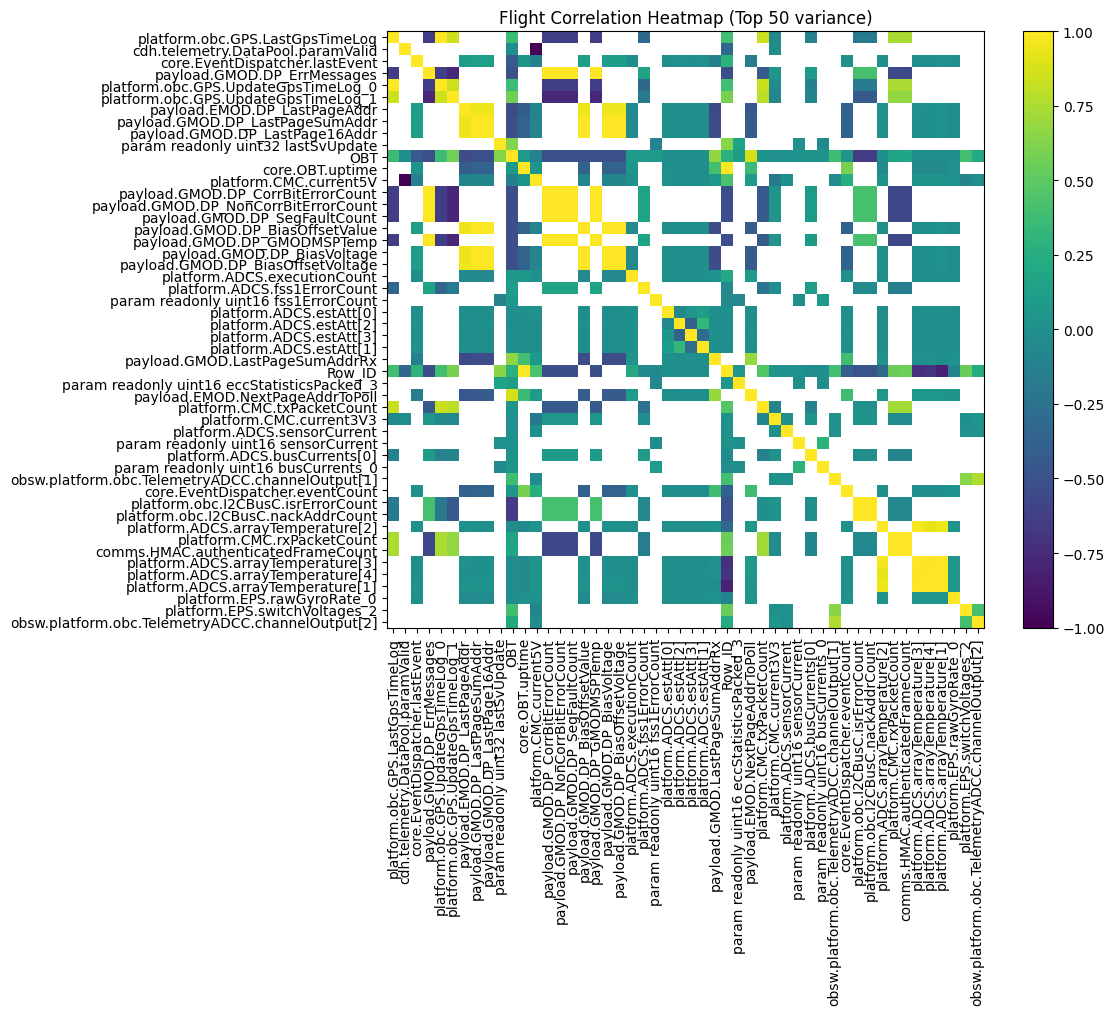

In [13]:
top_cols = flight_num.var().sort_values(ascending=False).head(50).index
corr = flight_num[top_cols].corr()

plt.figure(figsize=(12,10))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(top_cols)), top_cols, rotation=90)
plt.yticks(range(len(top_cols)), top_cols)
plt.title("Flight Correlation Heatmap (Top 50 variance)")
plt.tight_layout()
plt.show()

In [14]:
flight_df = preprocessing.add_anomaly_bin(flight_df)
tvac_df   = preprocessing.add_anomaly_bin(tvac_df)

if "Anomaly_Bin" in flight_df.columns:
    print("Flight anomaly distribution:")
    print(flight_df["Anomaly_Bin"].value_counts())

Flight anomaly distribution:
Anomaly_Bin
0    55055
1    17335
Name: count, dtype: int64


In [16]:
prep = preprocessing.fit_preprocessing(flight_df, tvac_df, pca_variance=0.95)

print("Number of PCA components:", prep["pca"].n_components_)
print("Explained variance total:", prep["pca"].explained_variance_ratio_.sum())

Number of PCA components: 46
Explained variance total: 0.9501933562258729


In [17]:
flight_pca = preprocessing.transform_dataset(flight_df, prep)
tvac_pca   = preprocessing.transform_dataset(tvac_df, prep)

print("Flight PCA shape:", flight_pca.shape)

Flight PCA shape: (72390, 46)


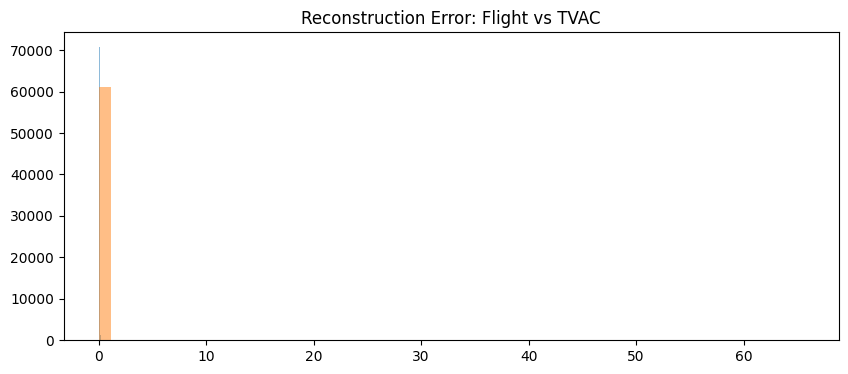

In [18]:
flight_re = preprocessing.pca_reconstruction_error(flight_df, prep)
tvac_re   = preprocessing.pca_reconstruction_error(tvac_df, prep)

plt.figure(figsize=(10,4))
plt.hist(flight_re, bins=60, alpha=0.5)
plt.hist(tvac_re, bins=60, alpha=0.5)
plt.title("Reconstruction Error: Flight vs TVAC")
plt.show()

In [19]:
if "Anomaly_Bin" in flight_df.columns:
    flight_df["recon_error"] = flight_re
    
    print("Mean error (normal):",
          flight_df.loc[flight_df["Anomaly_Bin"]==0,"recon_error"].mean())
    
    print("Mean error (anomaly):",
          flight_df.loc[flight_df["Anomaly_Bin"]==1,"recon_error"].mean())

Mean error (normal): 0.03556553253897631
Mean error (anomaly): 0.03775774717087181


In [20]:
loadings = pd.Series(prep["pca"].components_[0],
                     index=prep["columns"]).sort_values(key=lambda x: abs(x), ascending=False)

print("Top sensors influencing PC1:")
display(loadings.head(20))

Top sensors influencing PC1:


platform.CMC.current5V                              0.116770
platform.CMC.voltage3V3                             0.112908
platform.EPS.switchCurrents_6                       0.112681
platform.EPS.busCurrentDraws_1                      0.112592
platform.BAT.batteryVoltage_1                       0.112451
platform.BAT.batteryVoltage_0                       0.112449
platform.BAT.batteryCurrent_1                       0.112422
platform.BAT.batteryVoltage_2                       0.112121
platform.EPS.switchVoltages_4                       0.112086
platform.EPS.switchCurrents_3                       0.112069
platform.EPS.switchCurrents_4                       0.111909
obsw.platform.obc.TelemetryADCA.channelOutput[5]    0.111707
obsw.platform.obc.TelemetryADCC.channelOutput[3]    0.111707
obsw.platform.obc.TelemetryADCC.channelOutput[4]    0.111707
obsw.platform.obc.TelemetryADCA.channelOutput[4]    0.111706
obsw.platform.obc.TelemetryADCC.channelOutput[6]    0.111706
obsw.platform.obc.Teleme